In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [79]:
cmx=confusion_matrixes=pd.read_feather("data/confusion_matrixes.feather")
replaced=cmx["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+") #shorten names to plot easier
cmx["MODEL"]=replaced.where(~replaced.isna(), cmx["MODEL"], axis=0)

In [80]:
res=results=pd.read_feather("data/results.feather")
replaced=res["MODEL"].str.extract(r"mirluvams/(\w+-\w+)-.+")
res["MODEL"]=replaced.where(~replaced.isna(), res["MODEL"], axis=0)

In [81]:
res.shape

(450, 5)

In [82]:
res.columns

Index(['MODEL', 'SLICE', 'METRIC', 'CLASS', 'VALUE'], dtype='object')

In [83]:
res

,MODEL,SLICE,METRIC,CLASS,VALUE
0,swinv2-base,train,PRECISION,INACTIVE,0.967367
1,swinv2-base,train,RECALL,INACTIVE,0.934370
2,swinv2-base,train,F1-SCORE,INACTIVE,0.950582
3,swinv2-base,train,SUPPORT,INACTIVE,2316.000000
4,swinv2-base,train,PRECISION,WITH_EXPLOSION,0.943775
...,...,...,...,...,...
445,y_median,total,PRECISION,WEIGHTED_AVG,0.205018
446,y_median,total,RECALL,WEIGHTED_AVG,0.452789
447,y_median,total,F1-SCORE,WEIGHTED_AVG,0.282241
448,y_median,total,SUPPORT,WEIGHTED_AVG,18481.000000


In [148]:

sns.set_theme(style="darkgrid", palette="viridis")

In [149]:
def plot_metric(metric, label=None):
    filtered=res[(res["SLICE"]=="test") & (res["METRIC"]==metric)]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    if label is not None:
        plt.xlabel(label)
    plt.ylabel("Modelo")

<Axes: xlabel='VALUE', ylabel='MODEL'>

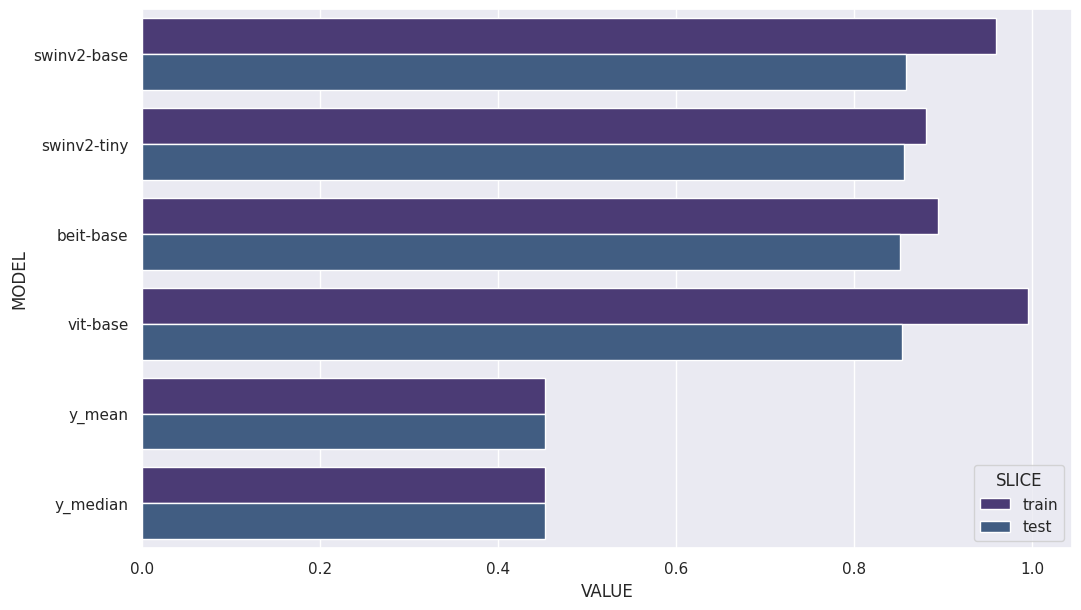

In [150]:
filtered=res[(res["SLICE"]!="total") & (res["METRIC"]=="ACCURACY")]
f, ax = plt.subplots(figsize=(12, 7))
sns.barplot(y="MODEL", x="VALUE", data=filtered, hue="SLICE", orient="h", ax=ax)

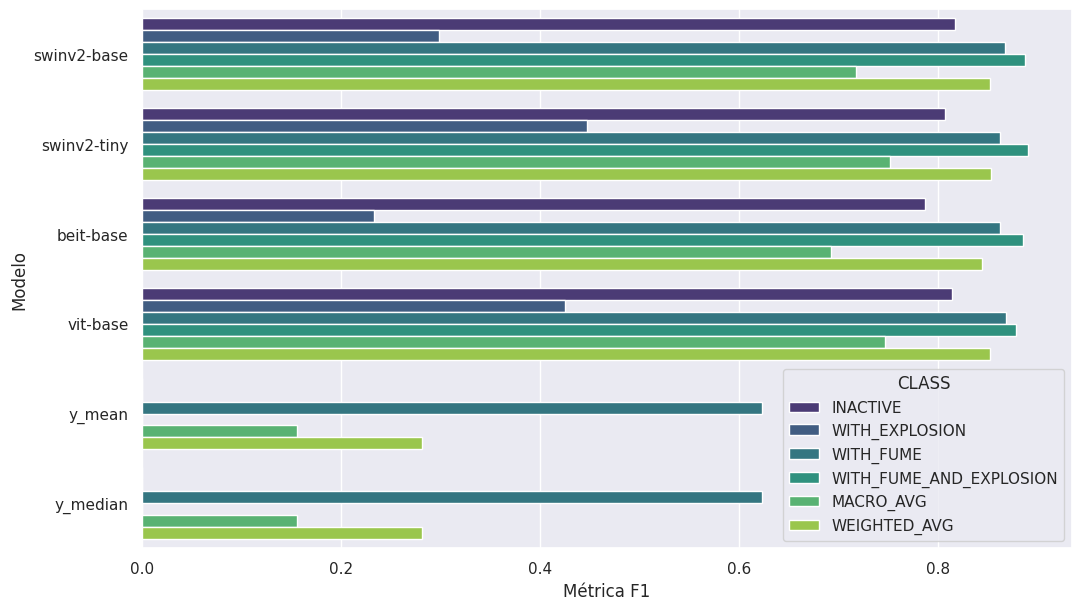

In [151]:
plot_metric("F1-SCORE", "Métrica F1")
plt.savefig("metrics/f1_global.png")
plt.show()

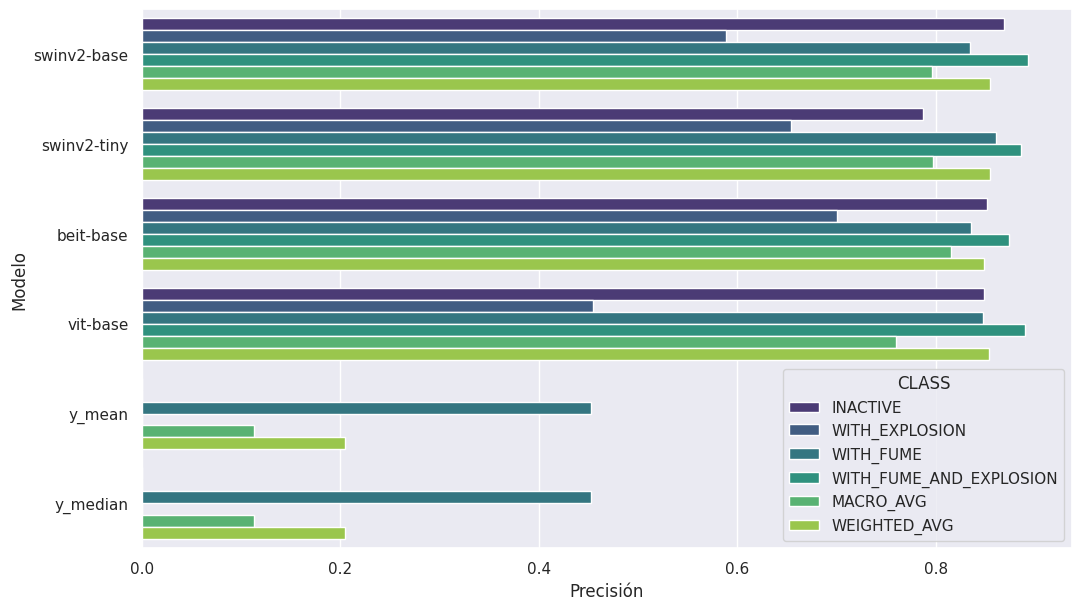

In [152]:
plot_metric("PRECISION", "Precisión")
plt.savefig("metrics/precision_global.png")
plt.show()

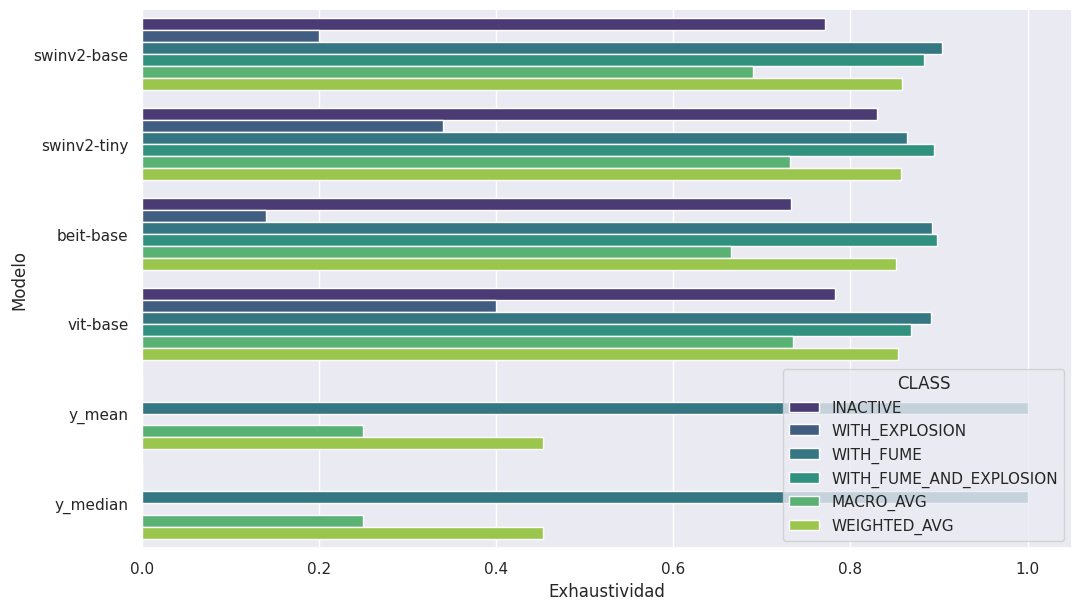

In [153]:
plot_metric("RECALL", "Exhaustividad")
plt.savefig("metrics/recall_global.png")
plt.show()

In [162]:

sns.set_theme(style="darkgrid",palette=sns.color_palette("cividis", 7))
def plot_model(model):
    filtered=res[(res["MODEL"]==model) & (res["SLICE"]=="test") & (res["METRIC"]!="SUPPORT")]
    f, ax = plt.subplots(figsize=(12, 7))
    ax=sns.barplot(y="METRIC", x="VALUE", data=filtered, hue="CLASS", orient="h", ax=ax)
    plt.xlabel("Valor")
    plt.ylabel("Métrica")
    plt.title(model)
    

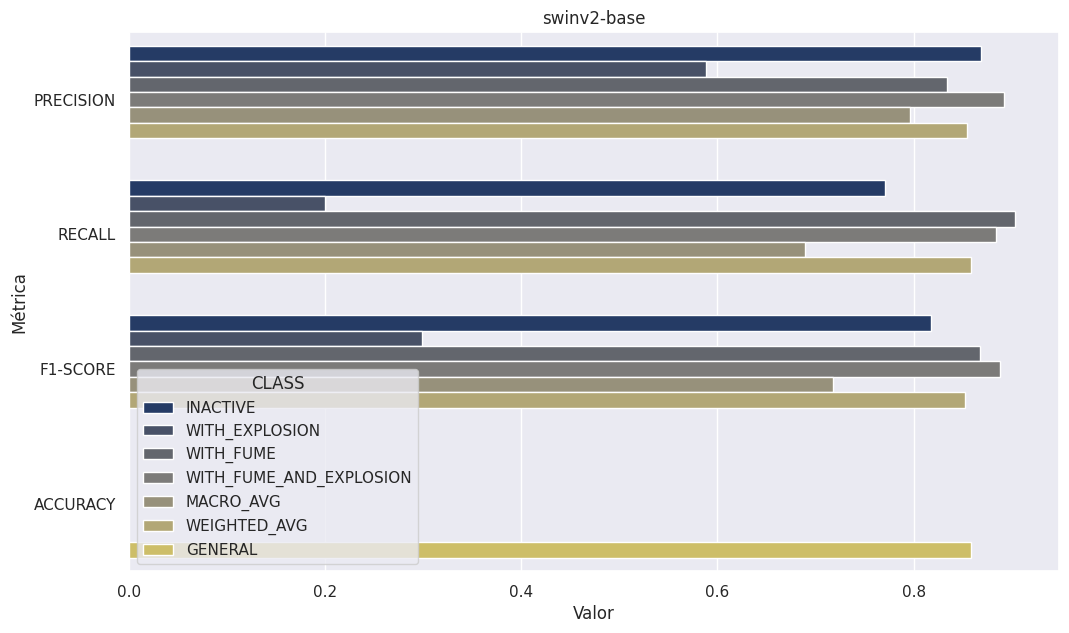

In [163]:
plot_model("swinv2-base")

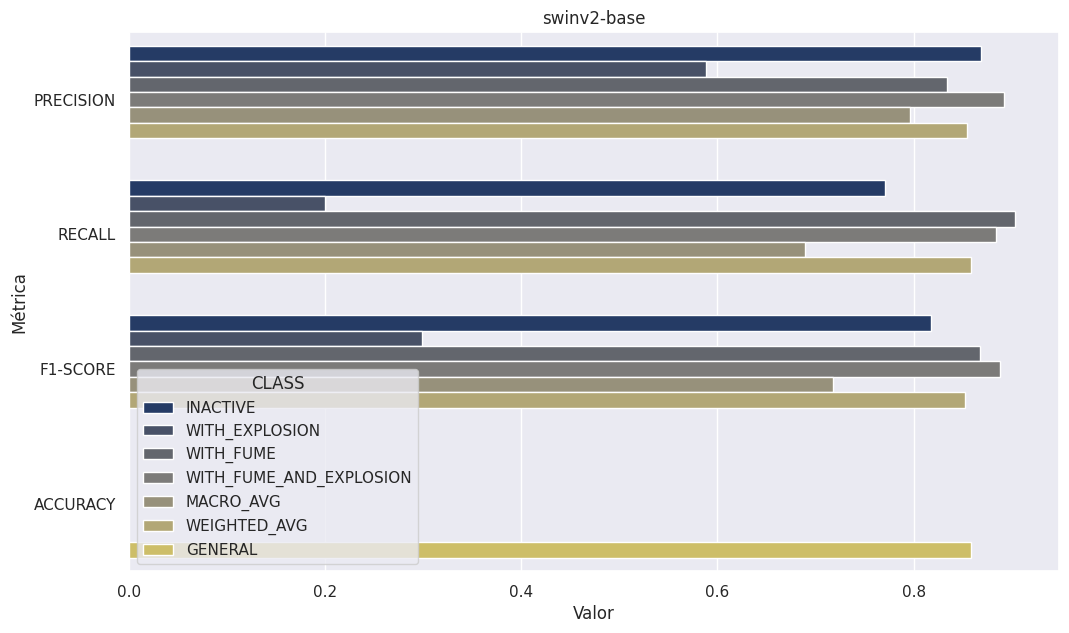

In [163]:
plot_model("swinv2-base")

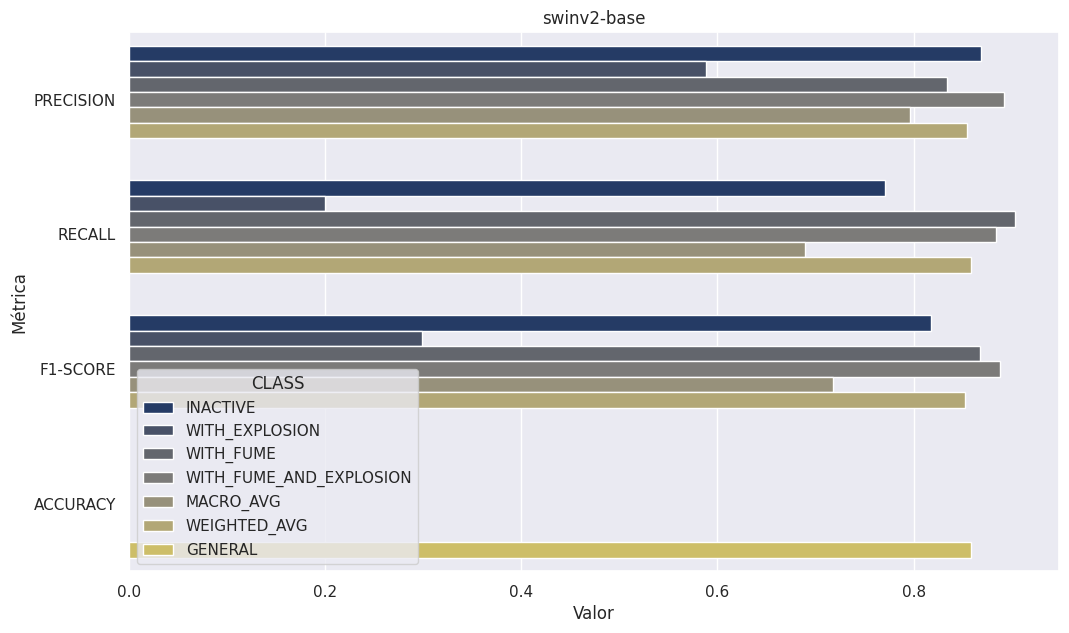

In [163]:
plot_model("swinv2-base")

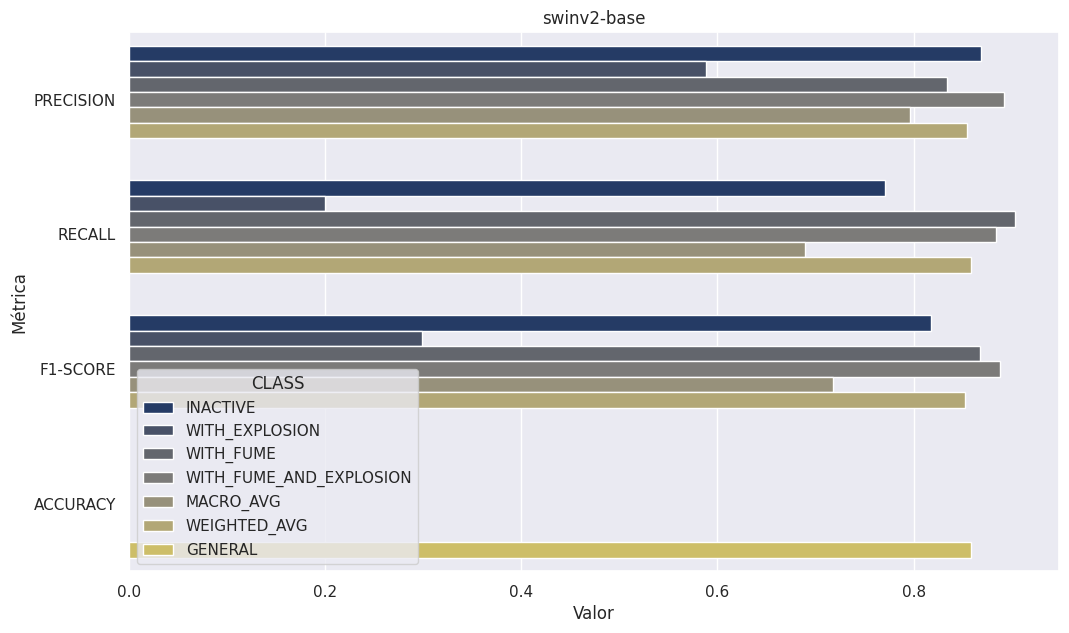

In [163]:
plot_model("swinv2-base")